In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog, local_binary_pattern
from skimage.filters import gabor
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')
%matplotlib inline
import os
warnings.filterwarnings('ignore')

In [10]:
# open csv file
df = pd.read_csv("/content/liver_tumor_segmentation.csv")
df.columns = df.columns.map(str.lower)                              # column names to lowercase
df.head()


,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [11]:
# check data types, it provides also details on null values, so next checking of null values may not be required
df.info()
df.shape
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   total_bilirubin             583 non-null    float64
 3   direct_bilirubin            583 non-null    float64
 4   alkaline_phosphotase        583 non-null    int64  
 5   alamine_aminotransferase    583 non-null    int64  
 6   aspartate_aminotransferase  583 non-null    int64  
 7   total_protiens              583 non-null    float64
 8   albumin                     583 non-null    float64
 9   albumin_and_globulin_ratio  579 non-null    float64
 10  dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Index(['age', 'gender', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'total_protiens', 'albumin',
       'albumin_and_globulin_ratio', 'dataset'],
      dtype='object')

In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,583.0,NaN,NaN,NaN,44.746141,16.189833,4.0,33.0,45.0,58.0,90.0
gender,583,2,Male,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bilirubin,583.0,NaN,NaN,NaN,3.298799,6.209522,0.4,0.8,1.0,2.6,75.0
direct_bilirubin,583.0,NaN,NaN,NaN,1.486106,2.808498,0.1,0.2,0.3,1.3,19.7
alkaline_phosphotase,583.0,NaN,NaN,NaN,290.576329,242.937989,63.0,175.5,208.0,298.0,2110.0
alamine_aminotransferase,583.0,NaN,NaN,NaN,80.713551,182.620356,10.0,23.0,35.0,60.5,2000.0
aspartate_aminotransferase,583.0,NaN,NaN,NaN,109.910806,288.918529,10.0,25.0,42.0,87.0,4929.0
total_protiens,583.0,NaN,NaN,NaN,6.48319,1.085451,2.7,5.8,6.6,7.2,9.6
albumin,583.0,NaN,NaN,NaN,3.141852,0.795519,0.9,2.6,3.1,3.8,5.5
albumin_and_globulin_ratio,579.0,NaN,NaN,NaN,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8


In [13]:
df.dtypes[df.dtypes=='object']

gender    object
dtype: object

In [14]:
print("Missing Values")
df.isnull().sum()

Missing Values


age                           0
gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    4
dataset                       0
dtype: int64

In [15]:
# replacing missing values with mean
df.albumin_and_globulin_ratio.fillna(df.albumin_and_globulin_ratio.mean(), inplace=True)

In [16]:
# are there still any missing values?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   total_bilirubin             583 non-null    float64
 3   direct_bilirubin            583 non-null    float64
 4   alkaline_phosphotase        583 non-null    int64  
 5   alamine_aminotransferase    583 non-null    int64  
 6   aspartate_aminotransferase  583 non-null    int64  
 7   total_protiens              583 non-null    float64
 8   albumin                     583 non-null    float64
 9   albumin_and_globulin_ratio  583 non-null    float64
 10  dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


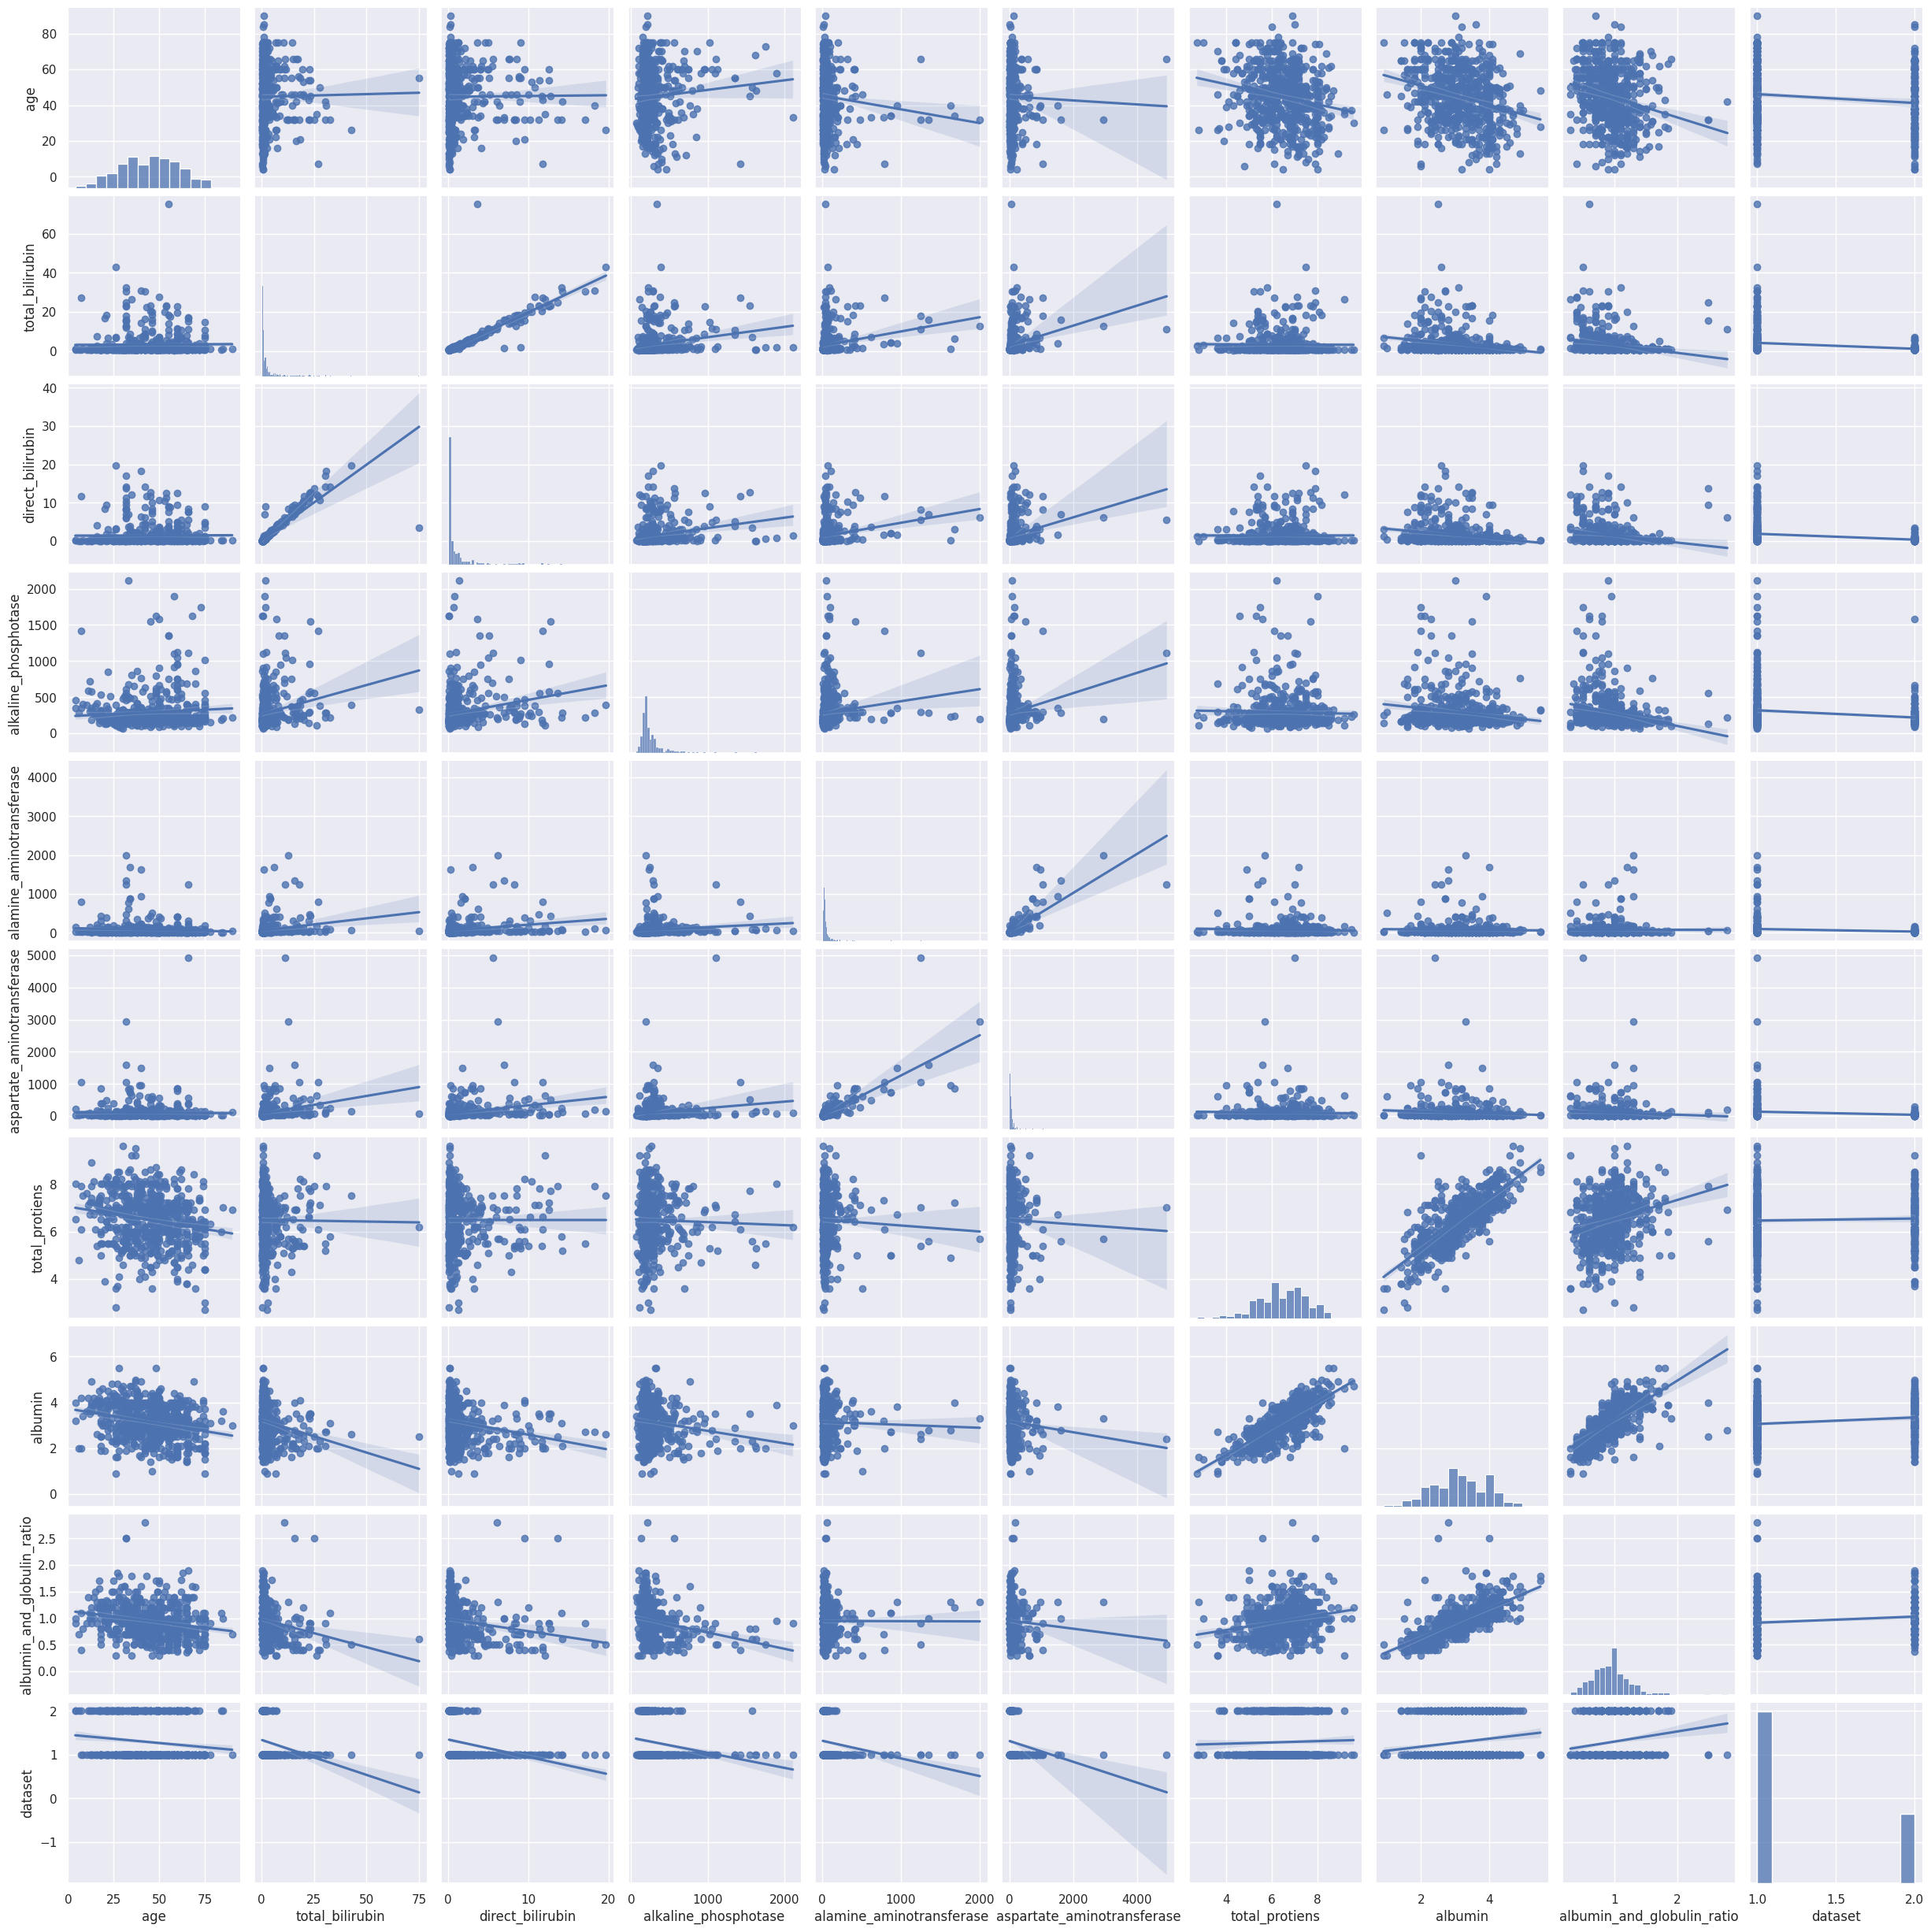

In [17]:
# correlation between variables
sns.set()
sns.pairplot(df, kind='reg')

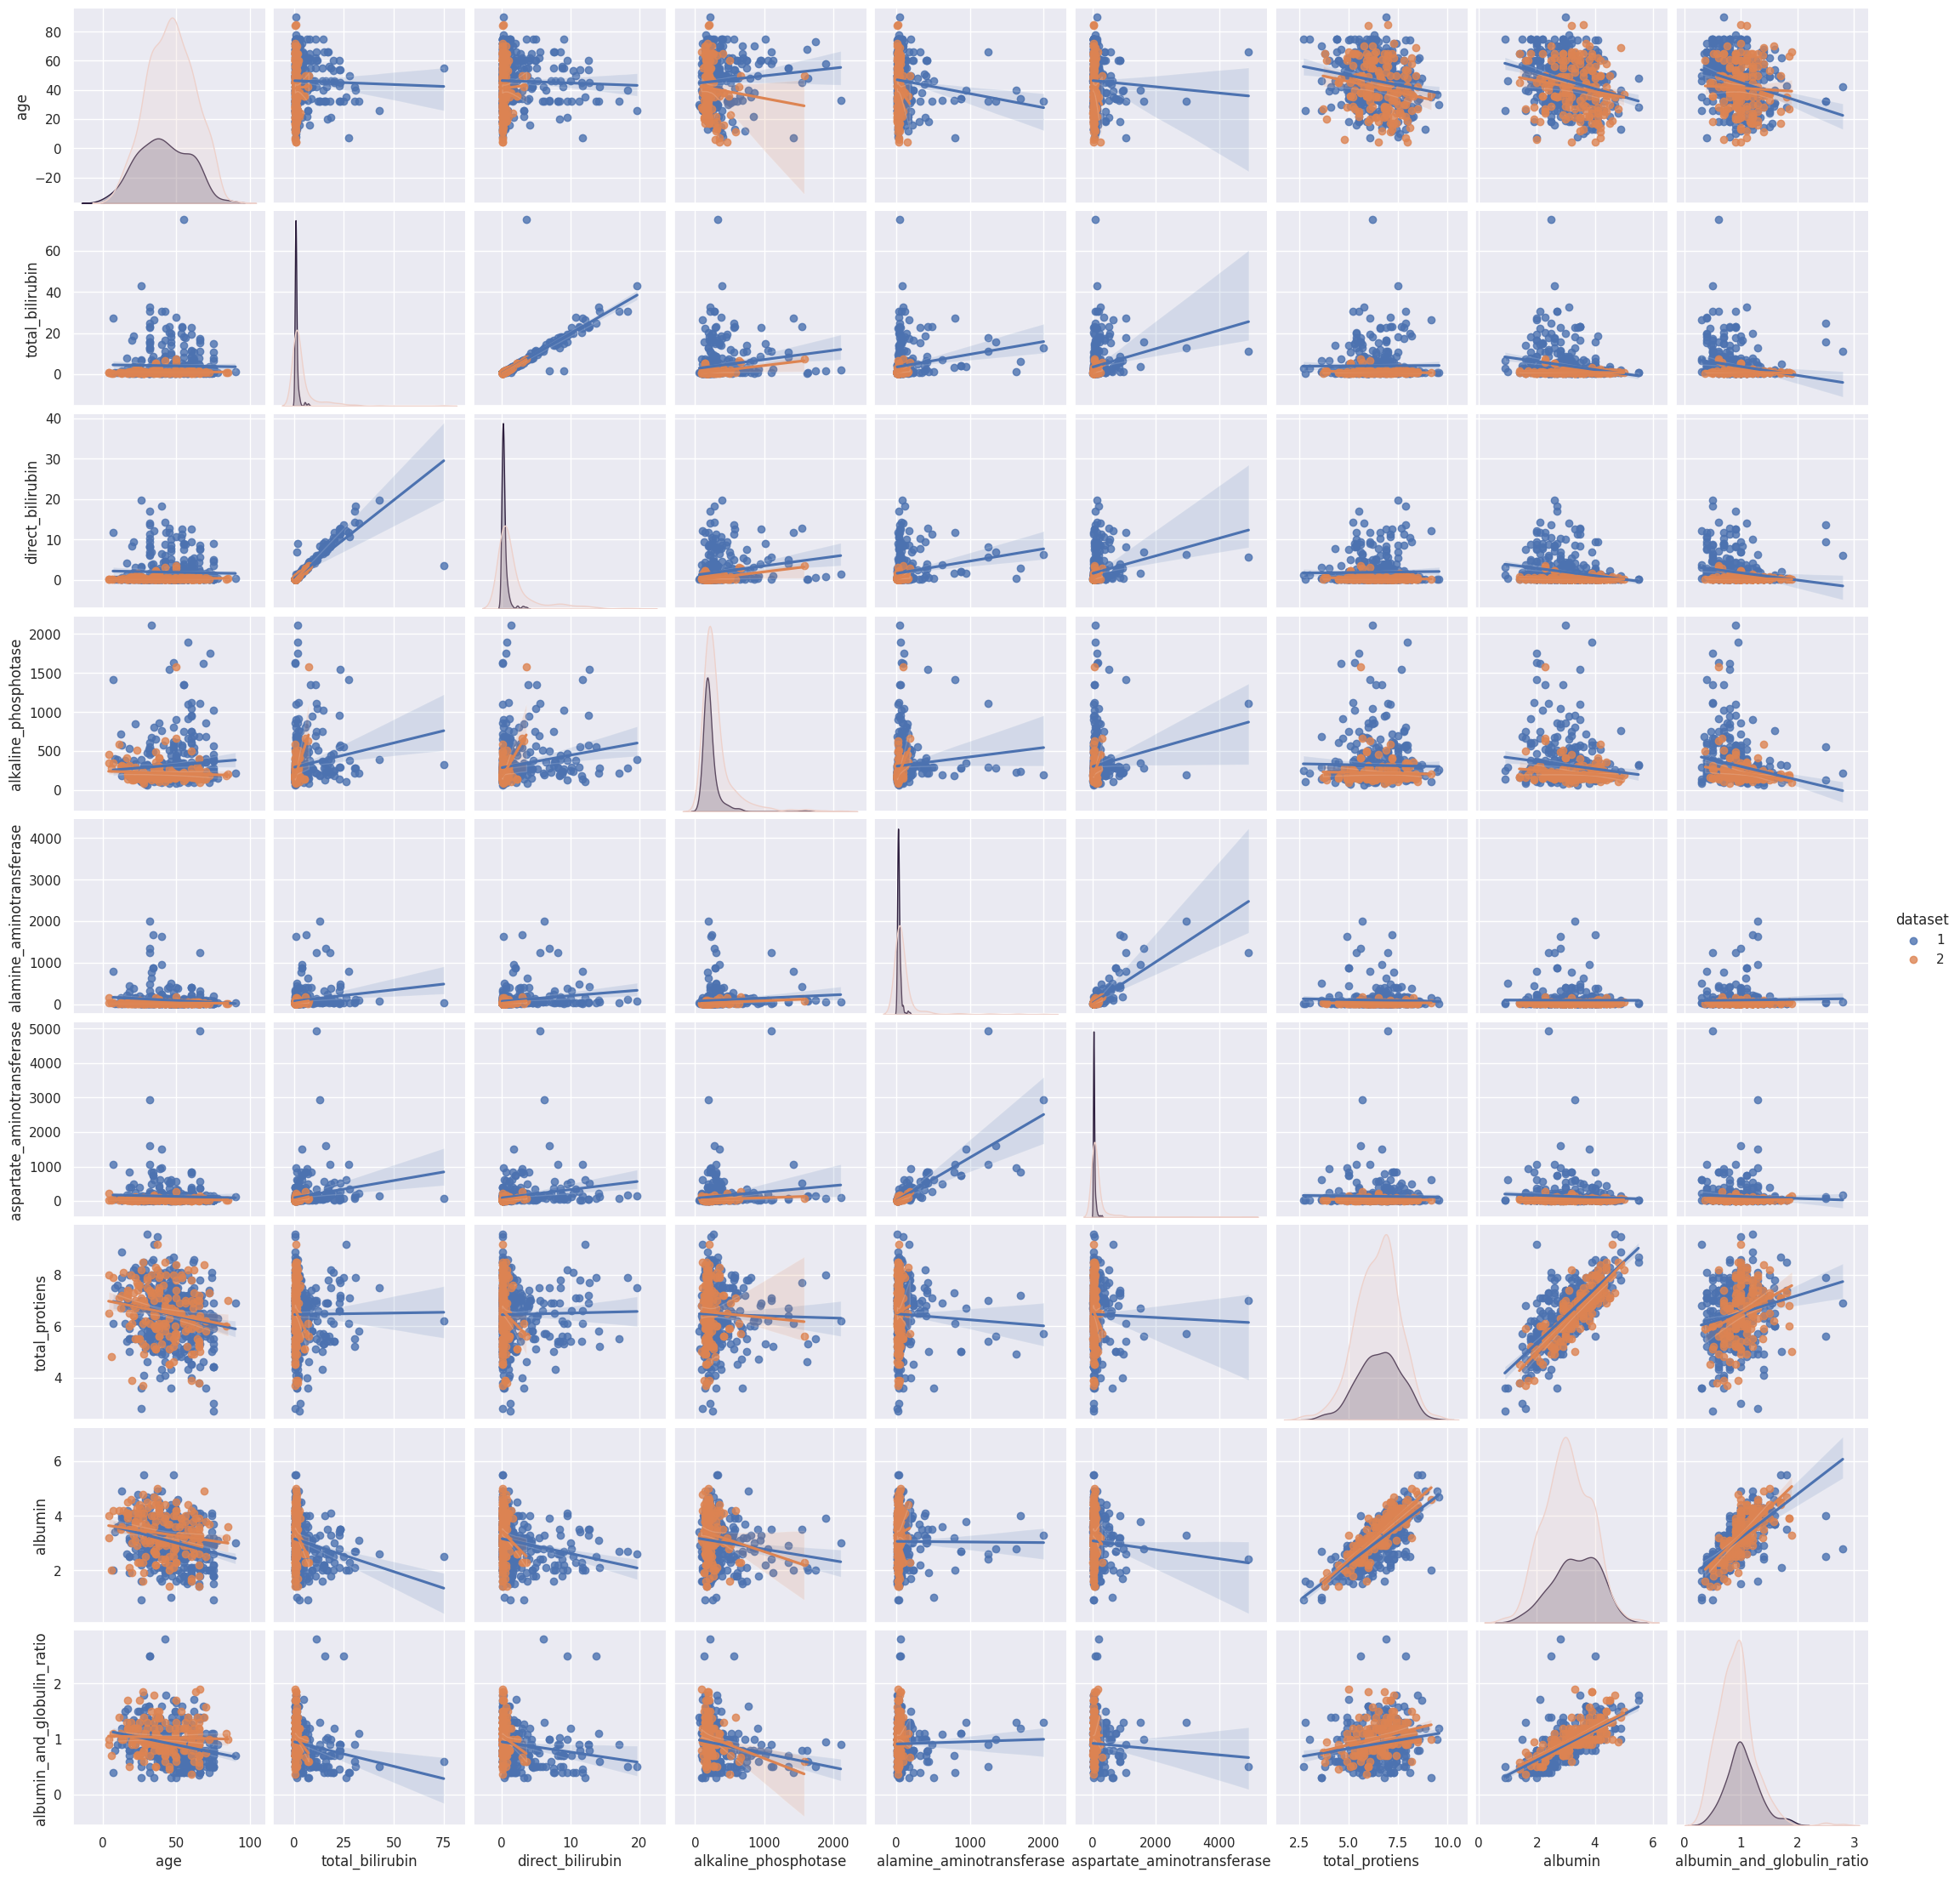

In [18]:
# correlation between variables
sns.set()
sns.pairplot(df, hue='dataset', kind='reg')

In [19]:
# this is simply my selection (from highly correlated features, you could also use different from pairs)
df.drop(['direct_bilirubin', 'aspartate_aminotransferase', 'total_protiens', 'albumin'], axis=1, inplace=True)

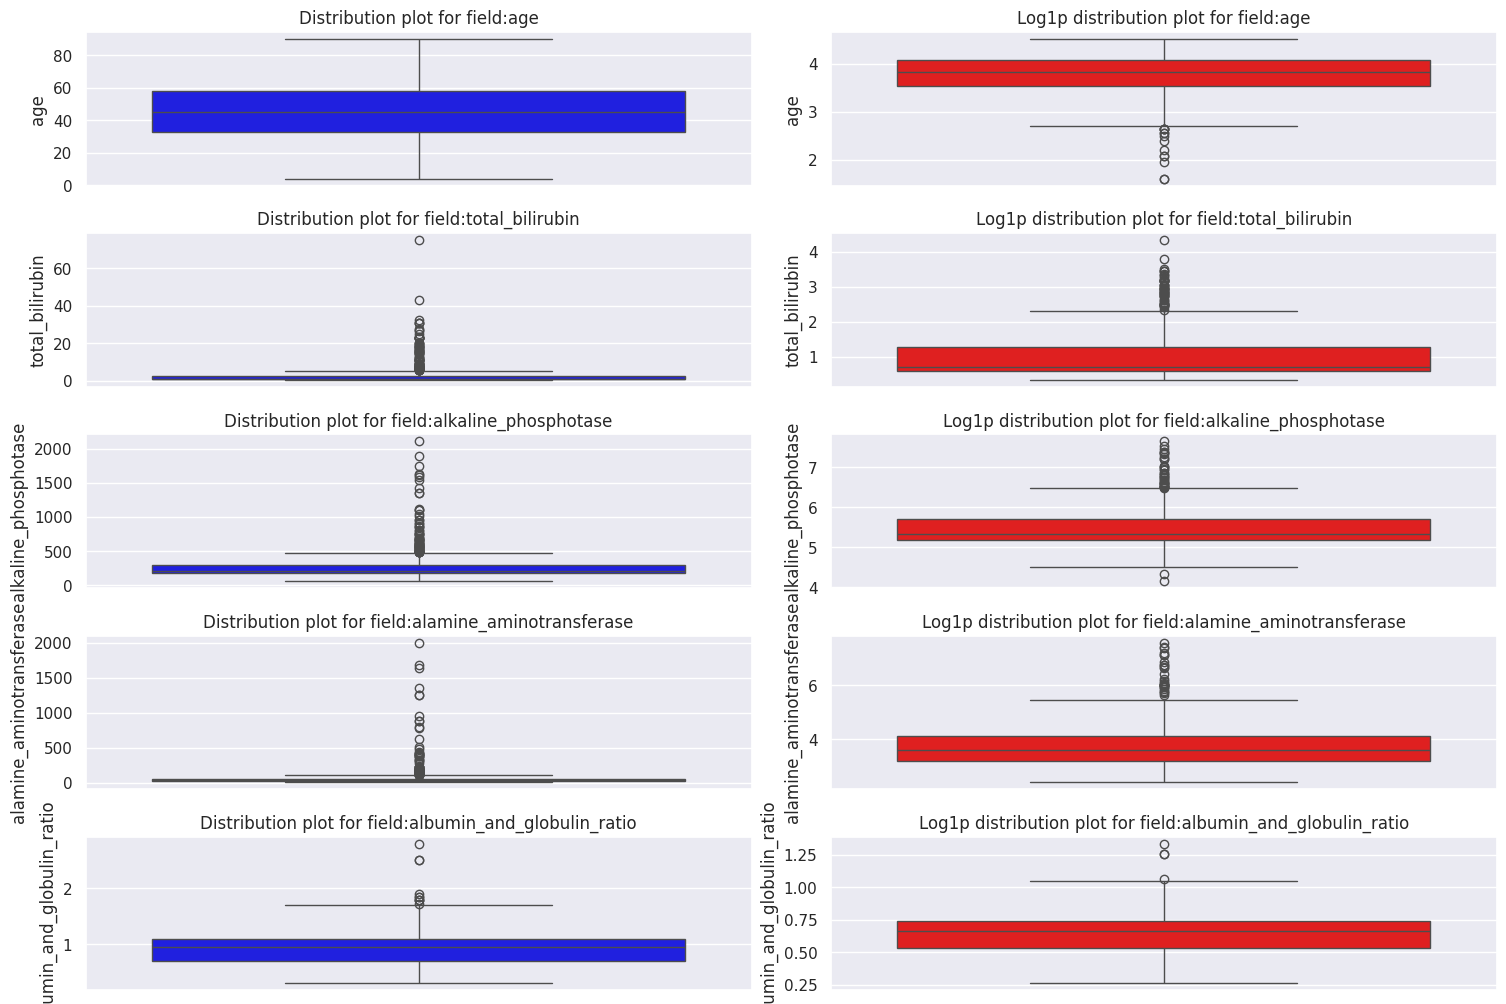

In [20]:
# outlier check
plt.figure(figsize=(15, 20))

for i, c in enumerate(df.drop('dataset', axis=1).select_dtypes(include='number').columns):
    plt.subplot(10,2,i*2+1)
    sns.boxplot(df[c], color='blue')
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


    plt.subplot(10,2,i*2+2)
    sns.boxplot(df[c].apply('log1p'), color='red')
    plt.title('Log1p distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

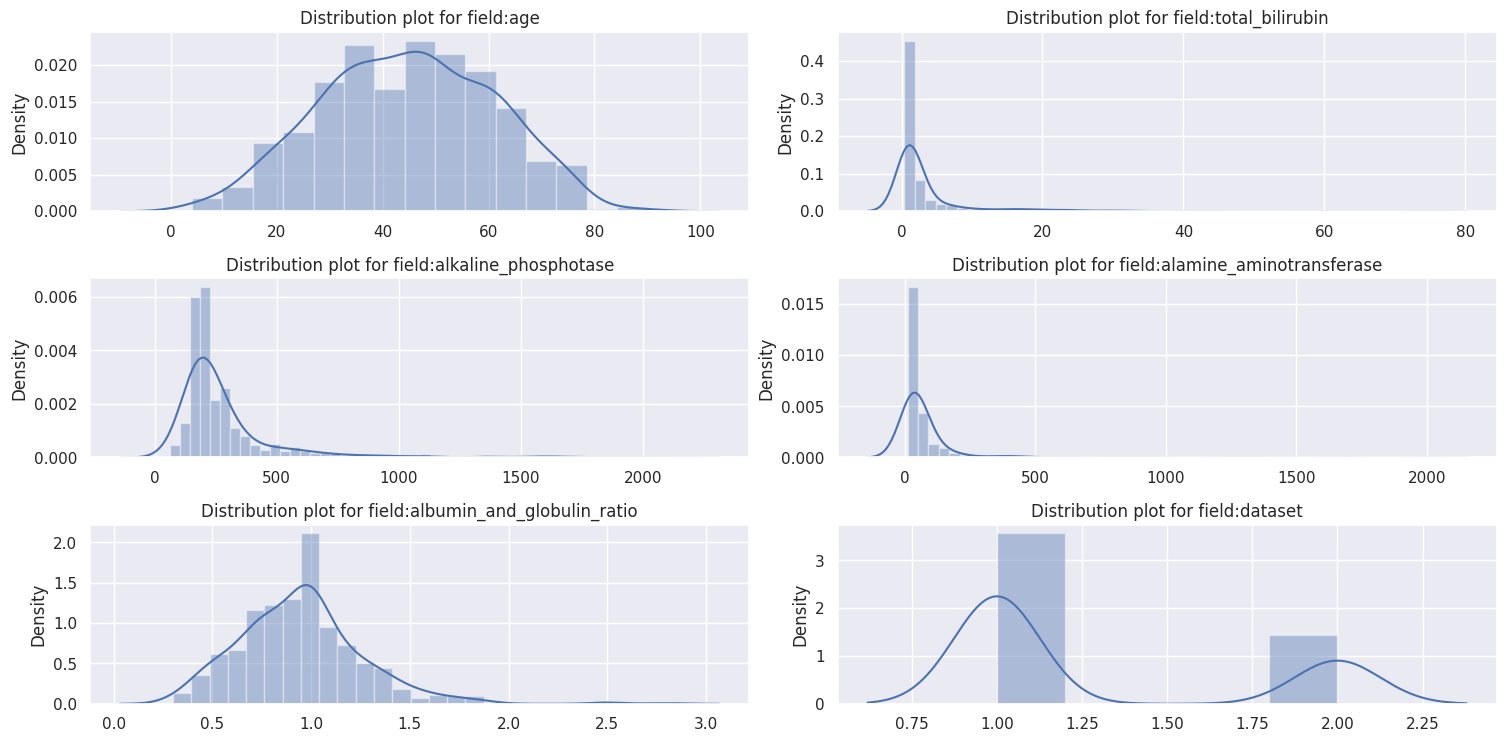

In [21]:
plt.figure(figsize=(15, 12))

for i, c in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5,2,i+1)
    sns.distplot(df[c])
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [23]:
# Apply log1p transformation on dataframe - just selected values
for c in skewed_cols:
    df[c] = df[c].apply('log1p')

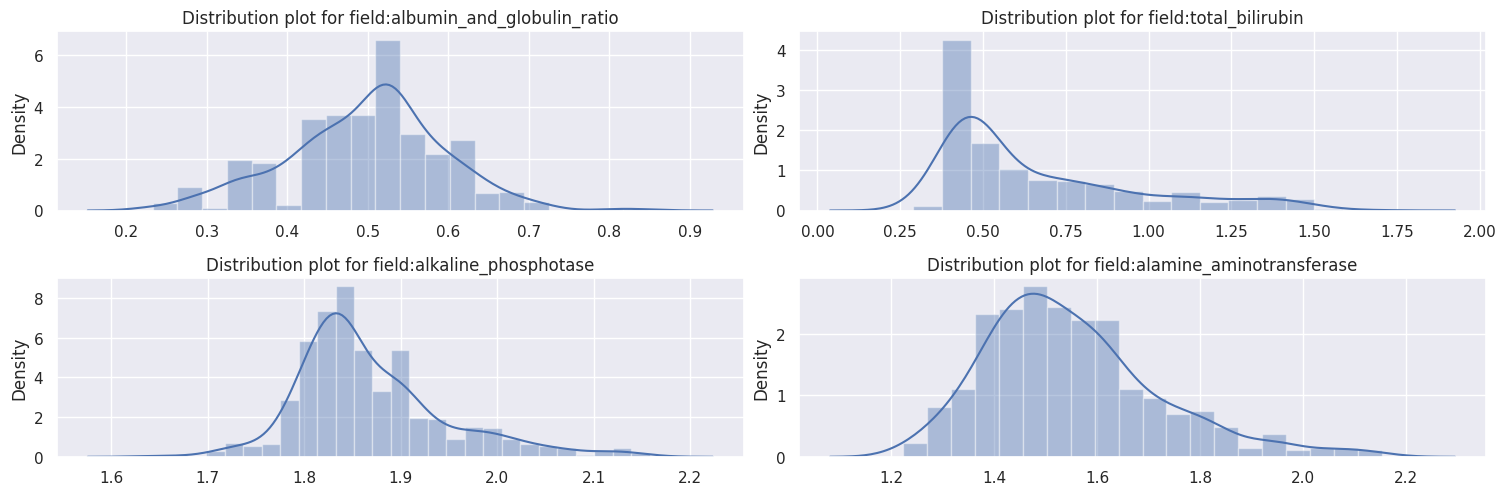

In [24]:
# Next check & fix strongly skewed features
# apply log1p transform
plt.figure(figsize=(15, 12))

for i, c in enumerate(skewed_cols):
    plt.subplot(5,2,i+1)
    sns.distplot(df[c].apply(np.log1p))
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [25]:
from sklearn.preprocessing import LabelEncoder, RobustScaler

In [26]:
# gender contains string values Male, Female; these will be converted into 0, 1, as ML algorithms like just numerical values
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df.gender.head()

0    0
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

In [27]:
rs = RobustScaler()
for c in df[['age', 'gender', 'total_bilirubin', 'alkaline_phosphotase', 'alamine_aminotransferase', 'albumin_and_globulin_ratio']].columns:
    df[c] = rs.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,age,gender,total_bilirubin,alkaline_phosphotase,alamine_aminotransferase,albumin_and_globulin_ratio,dataset
0,0.80,-1.0,-0.234465,-0.200886,-0.797391,-0.115796,1
1,0.68,0.0,2.572890,2.293084,0.627949,-0.532099,1
2,0.68,0.0,2.053111,1.620312,0.560449,-0.140769,1
3,0.52,0.0,0.000000,-0.252023,-0.930409,0.126945,1
4,1.08,0.0,1.292782,-0.121830,-0.267086,-1.560985,1


In [28]:
from sklearn.utils import resample
df.dataset.value_counts()

dataset
1    416
2    167
Name: count, dtype: int64

In [29]:
# Split data on majority and minority.. minority is dataset == 2
minority = df[df.dataset==2]
majority = df[df.dataset==1]

print('Minority size:', minority.shape)
print('Majority size:', majority.shape)

Minority size: (167, 7)
Majority size: (416, 7)


In [30]:
# choosing upsample as even now we do not have too much data
minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
print('Minority upsampled size:', minority_upsample.shape)

Minority upsampled size: (416, 7)


In [31]:
# merge majority with upsampled minority
df = pd.concat([minority_upsample, majority], axis=0)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('dataset', axis=1), df['dataset'], test_size=0.25, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (624, 6)
Test values shape: (208, 6)
Train target shape: (624,)
Test target shape: (208,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

LogisticRegression()
Train performance
              precision    recall  f1-score   support

           1       0.77      0.66      0.71       313
           2       0.70      0.81      0.75       311

    accuracy                           0.73       624
   macro avg       0.74      0.73      0.73       624
weighted avg       0.74      0.73      0.73       624

Test performance
              precision    recall  f1-score   support

           1       0.73      0.47      0.57       103
           2       0.61      0.83      0.70       105

    accuracy                           0.65       208
   macro avg       0.67      0.65      0.64       208
weighted avg       0.67      0.65      0.64       208

Roc_auc score
0.6472954230235785

Confusion matrix
[[48 55]
 [18 87]]
Train accuracy: 0.7323717948717948
Test accuracy: 0.6490384615384616


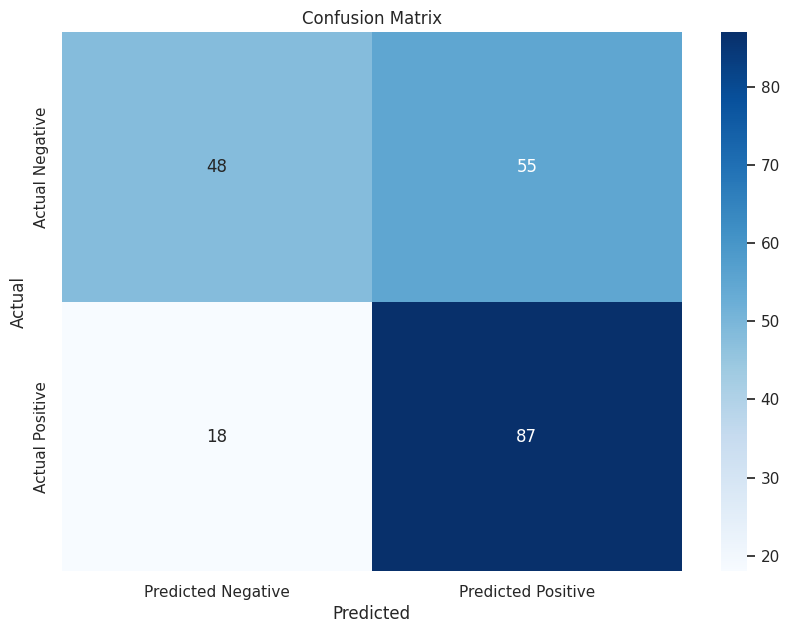

In [34]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)

print(lr)
print('Train performance')

print(classification_report(y_train, y_train_hat))

print('Test performance')

print(classification_report(y_test, y_test_hat))

print('Roc_auc score')

print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')

print(confusion_matrix(y_test, y_test_hat))
# Calculate and print accuracy
train_accuracy = accuracy_score(y_train, y_train_hat)
test_accuracy = accuracy_score(y_test, y_test_hat)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

RandomForestClassifier(n_jobs=-1, random_state=123)
Train performance
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       313
           2       1.00      1.00      1.00       311

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624

Test performance
              precision    recall  f1-score   support

           1       0.94      0.73      0.82       103
           2       0.78      0.95      0.86       105

    accuracy                           0.84       208
   macro avg       0.86      0.84      0.84       208
weighted avg       0.86      0.84      0.84       208

Roc_auc score
0.8402681460933888

Confusion matrix
[[ 75  28]
 [  5 100]]
Train accuracy: 1.0
Test accuracy: 0.8413461538461539


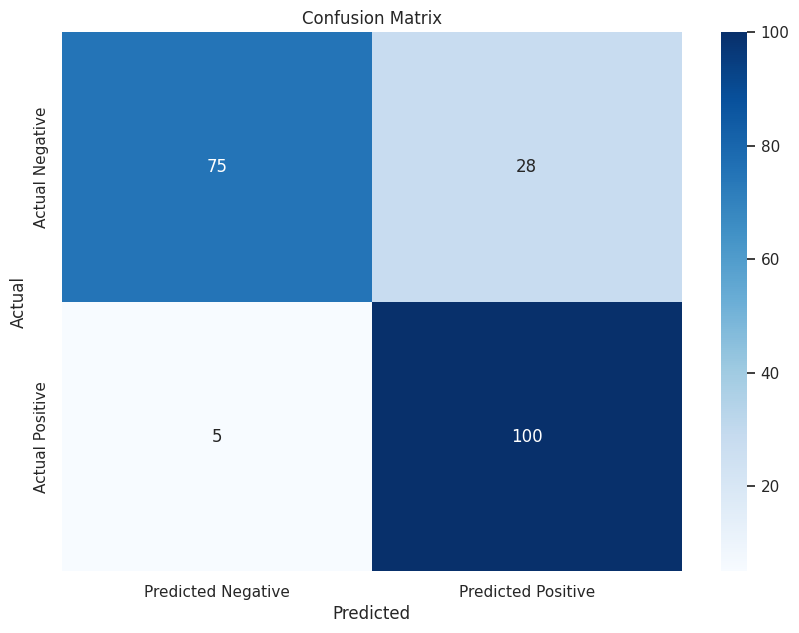

In [35]:
# Random Forest
rf = RandomForestClassifier(n_jobs=-1,random_state=123)
rf.fit(X_train, y_train)
y_train_hat = rf.predict(X_train)
y_test_hat = rf.predict(X_test)

print(rf)
print('Train performance')

print(classification_report(y_train, y_train_hat))

print('Test performance')

print(classification_report(y_test, y_test_hat))

print('Roc_auc score')

print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')

print(confusion_matrix(y_test, y_test_hat))
# Calculate and print accuracy
train_accuracy = accuracy_score(y_train, y_train_hat)
test_accuracy = accuracy_score(y_test, y_test_hat)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

MLPClassifier()
Train performance
              precision    recall  f1-score   support

           1       0.80      0.68      0.74       313
           2       0.72      0.83      0.77       311

    accuracy                           0.75       624
   macro avg       0.76      0.76      0.75       624
weighted avg       0.76      0.75      0.75       624

Test performance
              precision    recall  f1-score   support

           1       0.75      0.52      0.62       103
           2       0.64      0.83      0.72       105

    accuracy                           0.68       208
   macro avg       0.69      0.68      0.67       208
weighted avg       0.69      0.68      0.67       208

Roc_auc score
0.6764216366158115

Confusion matrix
[[54 49]
 [18 87]]
Train accuracy: 0.7548076923076923
Test accuracy: 0.6778846153846154


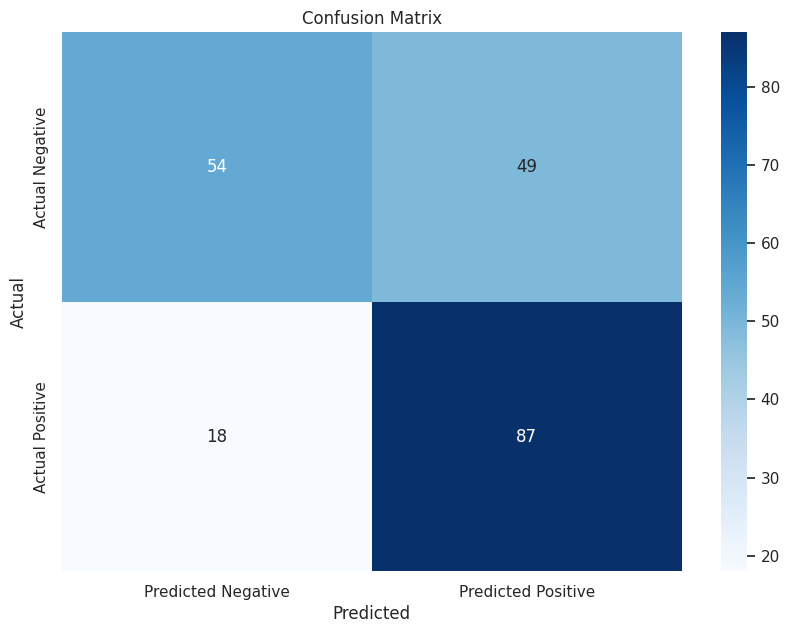

In [36]:
# Neural nets
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_train_hat = mlp.predict(X_train)
y_test_hat = mlp.predict(X_test)

print(mlp)
print('Train performance')

print(classification_report(y_train, y_train_hat))

print('Test performance')

print(classification_report(y_test, y_test_hat))

print('Roc_auc score')

print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')

print(confusion_matrix(y_test, y_test_hat))
# Calculate and print accuracy
train_accuracy = accuracy_score(y_train, y_train_hat)
test_accuracy = accuracy_score(y_test, y_test_hat)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

KNeighborsClassifier()
Train performance
              precision    recall  f1-score   support

           1       0.88      0.77      0.82       313
           2       0.79      0.90      0.84       311

    accuracy                           0.83       624
   macro avg       0.84      0.83      0.83       624
weighted avg       0.84      0.83      0.83       624

Test performance
              precision    recall  f1-score   support

           1       0.82      0.65      0.72       103
           2       0.71      0.86      0.78       105

    accuracy                           0.75       208
   macro avg       0.77      0.75      0.75       208
weighted avg       0.77      0.75      0.75       208

Roc_auc score
0.7538141470180304

Confusion matrix
[[67 36]
 [15 90]]
Train accuracy: 0.8317307692307693
Test accuracy: 0.7548076923076923


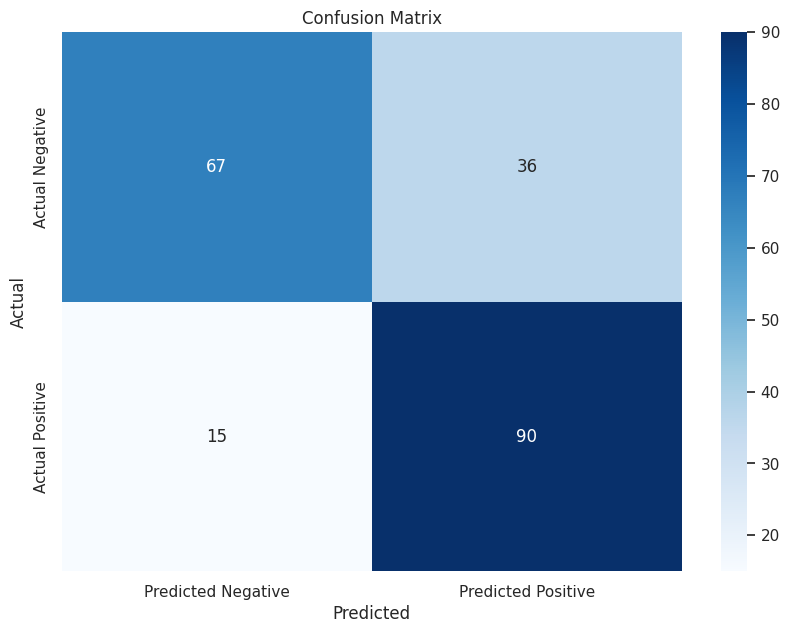

In [37]:
# K-Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_hat = knn.predict(X_train)
y_test_hat = knn.predict(X_test)
print(knn)
print('Train performance')

print(classification_report(y_train, y_train_hat))

print('Test performance')

print(classification_report(y_test, y_test_hat))

print('Roc_auc score')

print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')

print(confusion_matrix(y_test, y_test_hat))
# Calculate and print accuracy
train_accuracy = accuracy_score(y_train, y_train_hat)
test_accuracy = accuracy_score(y_test, y_test_hat)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
import numpy as np

unique_classes = np.unique(y_train)
print("Unique classes in y_train:", unique_classes)

y_train_binary = y_train - 1
y_test_binary = y_test - 1


from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=123)
xgb.fit(X_train, y_train_binary)
y_train_hat = xgb.predict(X_train)
y_test_hat = xgb.predict(X_test)


Unique classes in y_train: [1 2]


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)
Train performance
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00     313.0
           2       0.00      0.00      0.00     311.0

    acc

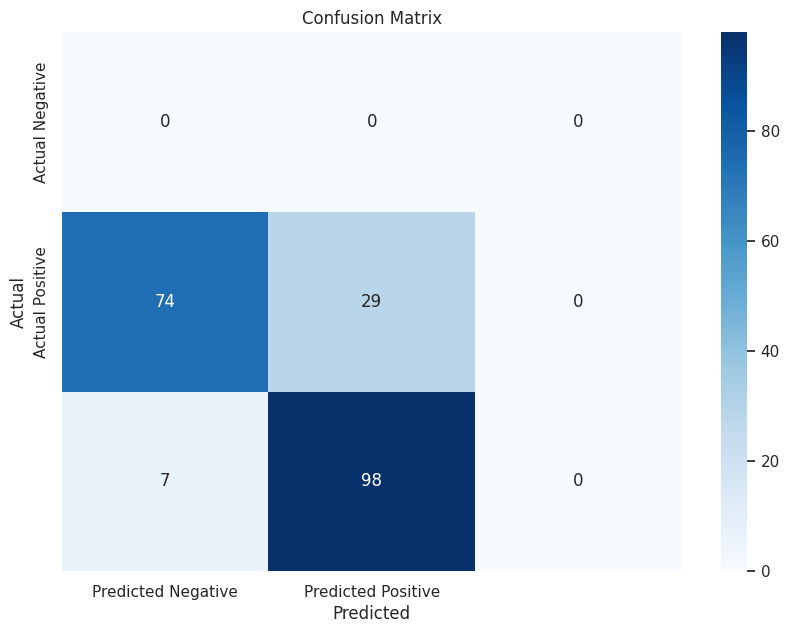

In [39]:
print(xgb)
print('Train performance')

print(classification_report(y_train, y_train_hat))

print('Test performance')

print(classification_report(y_test, y_test_hat))

print('Roc_auc score')

print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')

print(confusion_matrix(y_test, y_test_hat))
# Calculate and print accuracy
train_accuracy = accuracy_score(y_train, y_train_hat)
test_accuracy = accuracy_score(y_test, y_test_hat)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)


# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV, KFold


Best ROC AUC score (5-fold CV): 0.8942505104841858
Best parameters (5-fold CV): {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

Mean Cross-Validation Metrics (Random Forest):
accuracy: Mean = 0.7844
precision: Mean = 0.7821
recall: Mean = 0.7818
f1: Mean = 0.7764
mcc: Mean = 0.5635
roc_auc: Mean = 0.8881


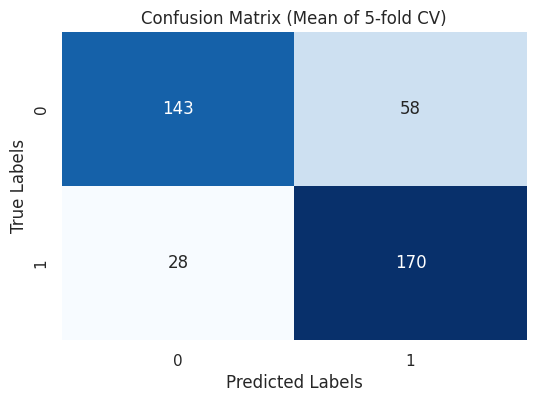


Best ROC AUC score (10-fold CV): 0.9040795163285852
Best parameters (10-fold CV): {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

Mean Cross-Validation Metrics (Random Forest):
accuracy: Mean = 0.7869
precision: Mean = 0.7822
recall: Mean = 0.7825
f1: Mean = 0.7741
mcc: Mean = 0.5641
roc_auc: Mean = 0.9013


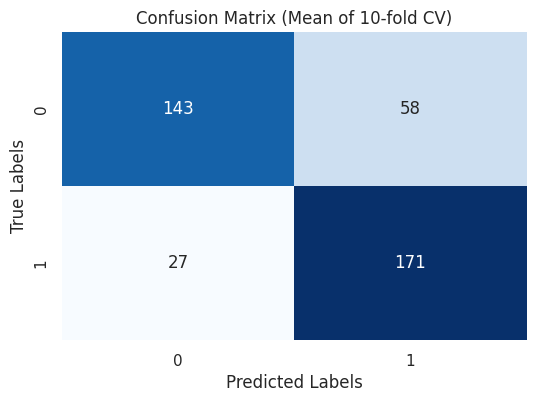

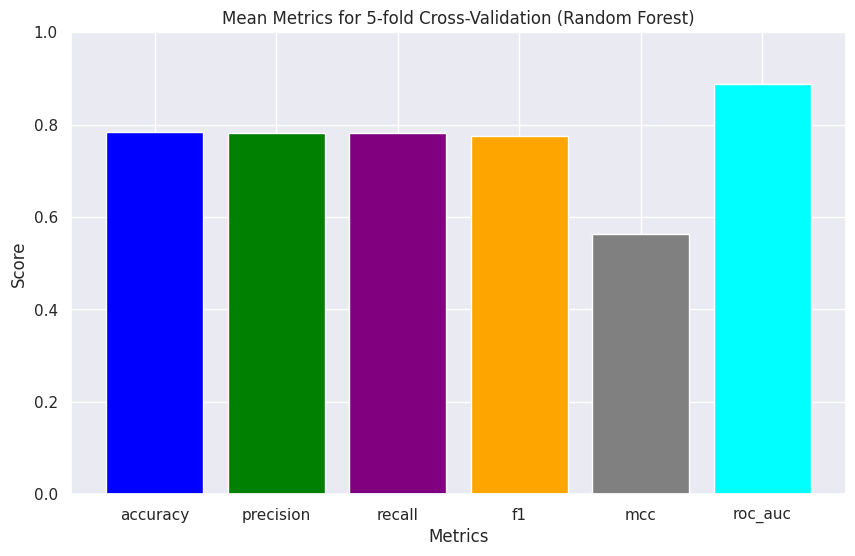

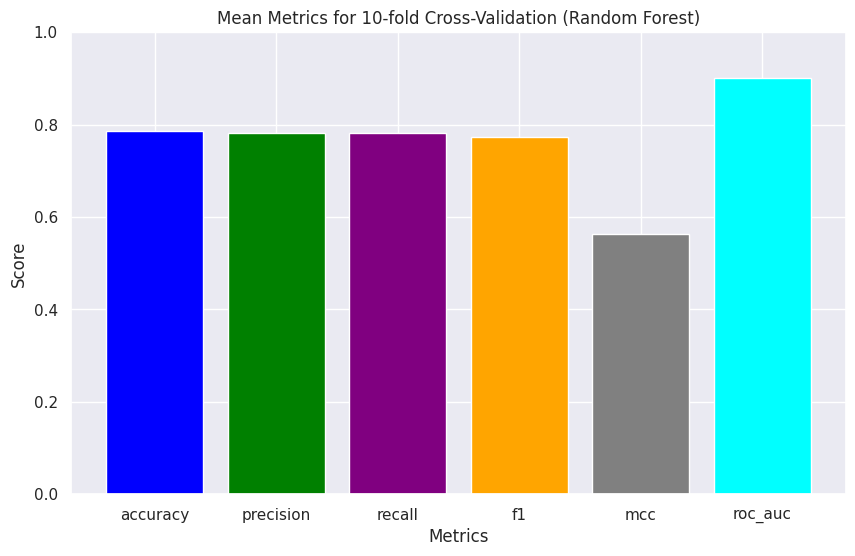

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Assume X_train, X_test, y_train, y_test are already defined

# Random forest parameter grid
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Function to perform cross-validation, calculate metrics, and plot confusion matrices
def cross_validation_metrics(X_train, y_train, X_test, y_test, n_splits):
    gs = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, cv=KFold(n_splits=n_splits), scoring='roc_auc', n_jobs=-1)
    gs.fit(X_train, y_train)

    print(f'\nBest ROC AUC score ({n_splits}-fold CV):', gs.best_score_)
    print(f'Best parameters ({n_splits}-fold CV):', gs.best_params_)

    metrics_rf = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'mcc': [], 'roc_auc': []}
    all_y_test = []
    all_y_pred = []

    best_model_rf = gs.best_estimator_
    kf = KFold(n_splits=n_splits)
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train the model on the current fold
        best_model_rf.fit(X_train_fold, y_train_fold)

        # Predict probabilities for each class
        y_prob_fold = best_model_rf.predict_proba(X_test_fold)

        # Ensure y_test_fold is 1-dimensional
        if y_test_fold.ndim > 1:
            y_test_fold = np.ravel(y_test_fold)  # Flatten if it's not already

        # Calculate and store metrics for the fold
        y_pred_fold = best_model_rf.predict(X_test_fold)
        metrics_rf['accuracy'].append(accuracy_score(y_test_fold, y_pred_fold))
        metrics_rf['precision'].append(precision_score(y_test_fold, y_pred_fold, average='macro'))
        metrics_rf['recall'].append(recall_score(y_test_fold, y_pred_fold, average='macro'))
        metrics_rf['f1'].append(f1_score(y_test_fold, y_pred_fold, average='macro'))
        metrics_rf['mcc'].append(matthews_corrcoef(y_test_fold, y_pred_fold))
        metrics_rf['roc_auc'].append(roc_auc_score(y_test_fold, y_prob_fold[:, 1], average='macro'))

        # Aggregate y_test and y_pred for confusion matrix calculation
        all_y_test.extend(y_test_fold)
        all_y_pred.extend(y_pred_fold)

    # Calculate mean metrics across all folds
    results_rf = {metric: np.mean(values) for metric, values in metrics_rf.items()}

    # Print results for Random Forest
    print("\nMean Cross-Validation Metrics (Random Forest):")
    for metric, mean_value in results_rf.items():
        print(f"{metric}: Mean = {mean_value:.4f}")

    # Compute confusion matrix for aggregated predictions
    conf_matrix = confusion_matrix(all_y_test, all_y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(f"Confusion Matrix (Mean of {n_splits}-fold CV)")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    return results_rf

# Function to plot bar charts for accuracy and ROC AUC
def plot_bar_charts(metrics_dict, title):
    metrics_names = list(metrics_dict.keys())
    metrics_values = list(metrics_dict.values())

    plt.figure(figsize=(10, 6))
    plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'purple', 'orange', 'gray', 'cyan'])
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title(title)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

# Example usage with 5-fold and 10-fold cross-validation
results_5fold = cross_validation_metrics(X_train, y_train, X_test, y_test, n_splits=5)
results_10fold = cross_validation_metrics(X_train, y_train, X_test, y_test, n_splits=10)

# Plot bar charts for accuracy and ROC AUC
plot_bar_charts(results_5fold, "Mean Metrics for 5-fold Cross-Validation (Random Forest)")
plot_bar_charts(results_10fold, "Mean Metrics for 10-fold Cross-Validation (Random Forest)")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Assume X_train, X_test, y_train, y_test are already defined

# Random forest parameter grid
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Function to perform cross-validation, calculate metrics, and plot confusion matrices
def cross_validation_metrics(X_train, y_train, X_test, y_test, n_splits):
    gs = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, cv=KFold(n_splits=n_splits), scoring='roc_auc', n_jobs=-1)
    gs.fit(X_train, y_train)

    print(f'\nBest ROC AUC score ({n_splits}-fold CV):', gs.best_score_)
    print(f'Best parameters ({n_splits}-fold CV):', gs.best_params_)

    metrics_rf = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'mcc': [], 'roc_auc': []}
    all_y_test = []
    all_y_pred = []

    best_model_rf = gs.best_estimator_
    kf = KFold(n_splits=n_splits)
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train the model on the current fold
        best_model_rf.fit(X_train_fold, y_train_fold)

        # Predict probabilities for each class
        y_prob_fold = best_model_rf.predict_proba(X_test_fold)

        # Ensure y_test_fold is 1-dimensional
        if y_test_fold.ndim > 1:
            y_test_fold = np.ravel(y_test_fold)  # Flatten if it's not already

        # Calculate and store metrics for the fold
        y_pred_fold = best_model_rf.predict(X_test_fold)
        metrics_rf['accuracy'].append(accuracy_score(y_test_fold, y_pred_fold))
        metrics_rf['precision'].append(precision_score(y_test_fold, y_pred_fold, average='macro'))
        metrics_rf['recall'].append(recall_score(y_test_fold, y_pred_fold, average='macro'))
        metrics_rf['f1'].append(f1_score(y_test_fold, y_pred_fold, average='macro'))
        metrics_rf['mcc'].append(matthews_corrcoef(y_test_fold, y_pred_fold))
        metrics_rf['roc_auc'].append(roc_auc_score(y_test_fold, y_prob_fold[:, 1], average='macro'))

        # Aggregate y_test and y_pred for confusion matrix calculation
        all_y_test.extend(y_test_fold)
        all_y_pred.extend(y_pred_fold)

    # Calculate mean metrics across all folds
    results_rf = {metric: np.mean(values) for metric, values in metrics_rf.items()}

    # Print results for Random Forest
    print("\nMean Cross-Validation Metrics (Random Forest):")
    for metric, mean_value in results_rf.items():
        print(f"{metric}: Mean = {mean_value:.4f}")

    # Compute confusion matrix for aggregated predictions
    conf_matrix = confusion_matrix(all_y_test, all_y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(f"Confusion Matrix (Mean of {n_splits}-fold CV)")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    return results_rf

# Function to plot bar charts for accuracy and ROC AUC
def plot_bar_charts(metrics_dict, title):
    metrics_names = list(metrics_dict.keys())
    metrics_values = list(metrics_dict.values())

    plt.figure(figsize=(10, 6))
    plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'purple', 'orange', 'gray', 'cyan'])
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title(title)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

# Example usage with 5-fold and 10-fold cross-validation
results_5fold = cross_validation_metrics(X_train, y_train, X_test, y_test, n_splits=5)
results_10fold = cross_validation_metrics(X_train, y_train, X_test, y_test, n_splits=10)

# Plot bar charts for accuracy and ROC AUC
plot_bar_charts(results_5fold, "Mean Metrics for 5-fold Cross-Validation (Random Forest)")
plot_bar_charts(results_10fold, "Mean Metrics for 10-fold Cross-Validation (Random Forest)")


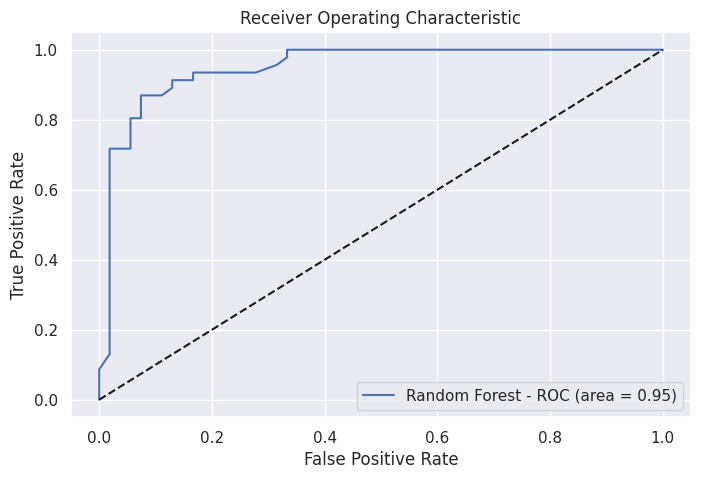

In [53]:
from sklearn import metrics

from sklearn.metrics import roc_auc_score
# Convert classes from [1, 2] to [0, 1]
y_train_binary = y_train - 1
y_test_binary = y_test - 1



# Fit the XGBoost classifier
xgb = RandomForestClassifier(random_state=123)
xgb.fit(X_train, y_train_binary)

# Make predictions
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr1, tpr1, thresholds = metrics.roc_curve(y_test_binary, y_pred_proba)
auc = metrics.roc_auc_score(y_test_binary, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr1, tpr1, label='Random Forest - ROC (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()